<a href="https://colab.research.google.com/github/shannu1584/car-price-prediction-ml/blob/main/car_price_prediction_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction with Machine Learning

**Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Load & Explore the Dataset**

In [ ]:
df=pd.read_csv('car data.csv')
print(df)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

* **To print first 5 Rows**



In [ ]:
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


* **To print last 5 Rows**


In [ ]:
print(df.tail())

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0       87934    Petrol   
299     city  2017          11.50           12.5        9000    Diesel   
300     brio  2016           5.30            5.9        5464    Petrol   

    Selling_type Transmission  Owner  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0  


* **To get information of data**


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


* **To get summary statistics**


In [ ]:
print(df.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


**Data Preprocessing**

*  **check for missing values**




In [ ]:
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


*  **Handle missing values**

In [ ]:
df=df.dropna()

*  **checking for duplicated values**

In [ ]:
print(df.duplicated().sum())

2


*  **To remove duplicate values**

In [ ]:
df=df.drop_duplicates()
print(df.duplicated().sum())

0


**Exploratory Data Analysis (EDA)**

*  **Correlation Heatmap**


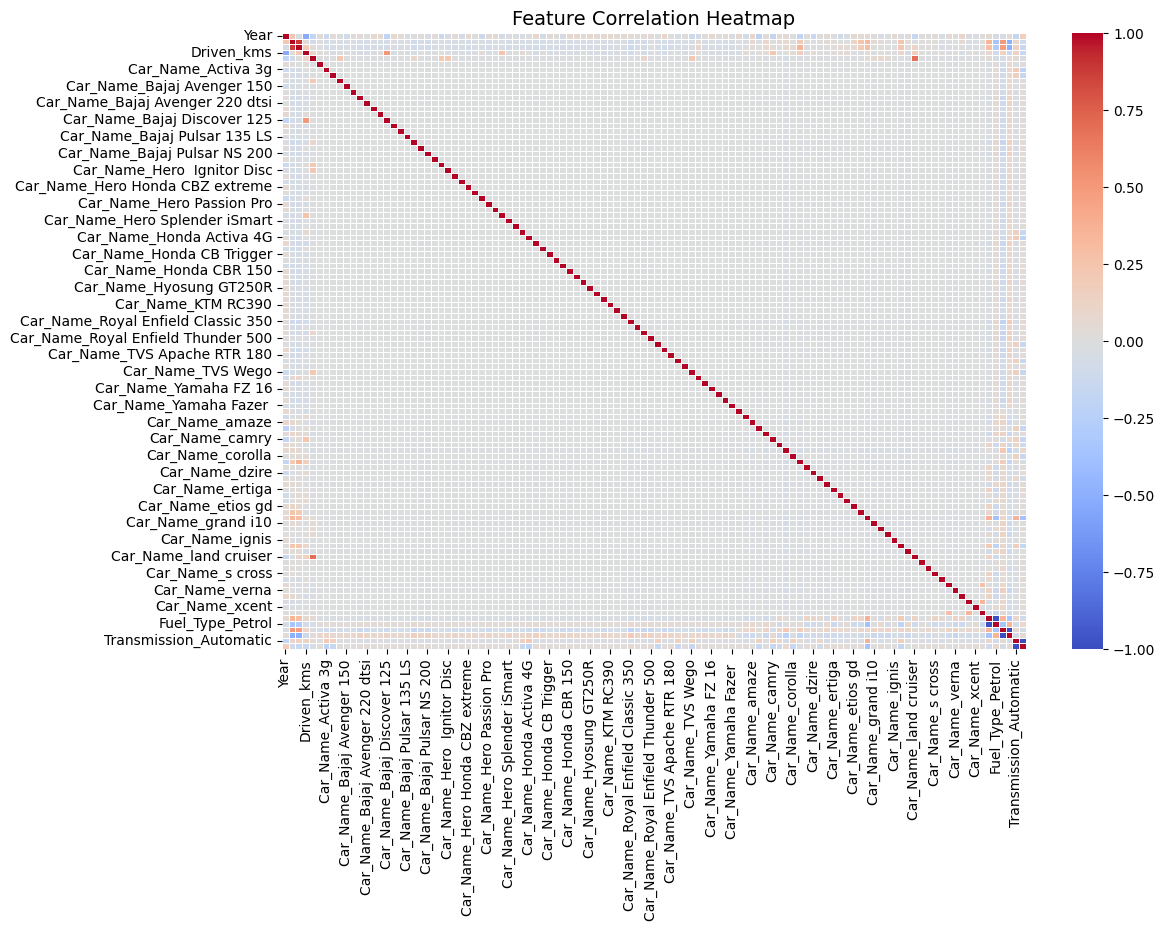

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_features = df.select_dtypes(include=['number']).drop(columns=['Car_Name'], errors='ignore')
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

* **Distribution of car prices**

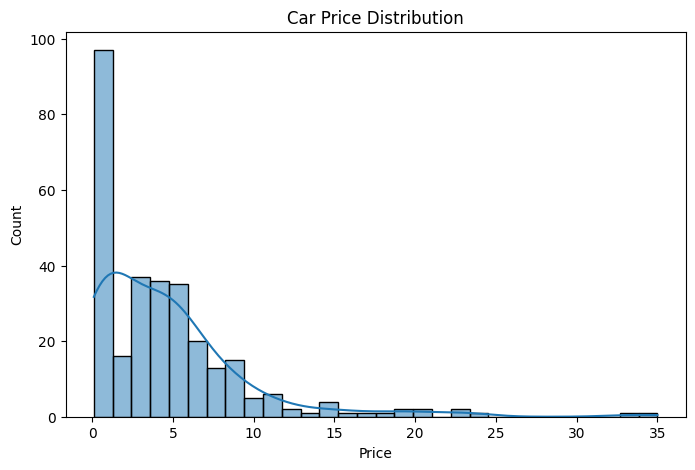

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Selling_Price"], bins=30, kde=True)
plt.title("Car Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

**Split the Data**

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Selling_Price'])
y=df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 109)
(61, 109)
(240,)
(61,)


In [ ]:
print(X_train.head())

       Year  Present_Price  Driven_kms  Owner  Car_Name_800  \
186  2010.0           0.52     22000.0    0.0           0.0   
134  2017.0           0.81     11800.0    0.0           0.0   
196  2008.0           0.52    500000.0    0.0           0.0   
76   2013.0          14.68     72000.0    0.0           0.0   
113  2016.0           1.40     35000.0    0.0           0.0   

     Car_Name_Activa 3g  Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  \
186                 0.0                 0.0                     0.0   
134                 0.0                 0.0                     0.0   
196                 0.0                 0.0                     0.0   
76                  0.0                 0.0                     0.0   
113                 0.0                 0.0                     0.0   

     Car_Name_Bajaj Avenger 150  Car_Name_Bajaj Avenger 150 street  ...  \
186                         0.0                                0.0  ...   
134                         0.0             

In [ ]:
print(X_test.head())

       Year  Present_Price  Driven_kms  Owner  Car_Name_800  \
179  2010.0           1.05    213000.0    0.0           0.0   
291  2015.0           6.10     31427.0    0.0           0.0   
230  2013.0           9.40     45000.0    0.0           0.0   
200  2006.0           0.75     92233.0    0.0           0.0   
61   2015.0           7.70     40588.0    0.0           0.0   

     Car_Name_Activa 3g  Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  \
179                 0.0                 0.0                     0.0   
291                 0.0                 0.0                     0.0   
230                 0.0                 0.0                     0.0   
200                 0.0                 0.0                     0.0   
61                  0.0                 0.0                     0.0   

     Car_Name_Bajaj Avenger 150  Car_Name_Bajaj Avenger 150 street  ...  \
179                         0.0                                0.0  ...   
291                         0.0             

In [ ]:
print(y_train.head())

186    0.25
134    0.65
196    0.17
76     5.50
113    1.15
Name: Selling_Price, dtype: float64


In [ ]:
print(y_train.isnull().sum())

2


In [ ]:
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()
y_train.fillna(y_train.mean(), inplace=True)

In [ ]:
print(y_train.isnull().sum())

0


**Train Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)
print("\n🔹 Decision Tree Performance")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_dt):.2f}")


🔹 Decision Tree Performance
MAE: 1.09
MSE: 5.32
R² Score: 0.80


**Train Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
print("\n🔹 Random Forest Performance")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.2f}")


🔹 Random Forest Performance
MAE: 1.11
MSE: 5.60
R² Score: 0.79


In [1]:
!pip install streamlit pyngrok pandas numpy scikit-learn matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.2 MB/s eta 0:00:00


In [34]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# ================= PAGE CONFIG =================
st.set_page_config(page_title="Car Price Prediction", page_icon="🚗")

st.title("🚗 Car Price Prediction")
st.write("Predict the selling price of a used car using Machine Learning")

# ================= LOAD DATA =================
df = pd.read_csv("car data.csv")

# Drop unnecessary column
df.drop(columns=["Car_Name"], inplace=True)

# Remove missing values
df.dropna(inplace=True)

# ================= ENCODING =================
le_fuel = LabelEncoder()
le_selling = LabelEncoder()
le_trans = LabelEncoder()

df["Fuel_Type"] = le_fuel.fit_transform(df["Fuel_Type"])
df["Selling_type"] = le_selling.fit_transform(df["Selling_type"])
df["Transmission"] = le_trans.fit_transform(df["Transmission"])

# ================= FEATURES =================
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

# ================= TRAIN MODEL =================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ================= USER INPUT =================
st.subheader("📥 Enter Car Details")

year = st.number_input("Year of Purchase", int(df["Year"].min()), int(df["Year"].max()), 2015)
present_price = st.number_input("Present Price (Lakhs)", 0.5, 50.0, 5.0)
driven_kms = st.number_input("Kilometers Driven", 0, 500000, 30000)
owner = st.selectbox("Owner", sorted(df["Owner"].unique()))

fuel = st.selectbox("Fuel Type", le_fuel.classes_)
selling_type = st.selectbox("Selling Type", le_selling.classes_)
transmission = st.selectbox("Transmission", le_trans.classes_)

# Encode inputs
fuel = le_fuel.transform([fuel])[0]
selling_type = le_selling.transform([selling_type])[0]
transmission = le_trans.transform([transmission])[0]

# Input dataframe (ORDER MUST MATCH X.columns)
input_data = pd.DataFrame([[year, present_price, driven_kms,
                            fuel, selling_type, transmission, owner]],
                          columns=X.columns)

# ================= PREDICTION =================
if st.button("🚀 Predict Price"):
    price = model.predict(input_data)[0]
    st.success(f"💰 Estimated Selling Price: ₹ {price:.2f} Lakhs")

st.caption("✨ Car Price Prediction App using Machine Learning ✨")


Overwriting app.py


In [35]:
!streamlit run app.py &>/content/logs.txt &


In [32]:
from pyngrok import ngrok

ngrok.kill()
ngrok.set_auth_token("33pyU8XWfrN8JFX8kwzY8Uf1j7s_612rotnaQX2f58dq3n8Ez")

public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://nonmultiplicative-iva-stumpy.ngrok-free.dev" -> "http://localhost:8501">